<a href="https://colab.research.google.com/github/HasanurRahmanKabir/Prediction-Using-Multiple-Model/blob/main/Prediction_Using_Multiple_Model_Lab_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/customer_churn_dataset-testing-master.csv')
df


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [5]:
df.dropna(inplace=True)
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
drop_cols = ['CustomerID', 'Age', 'Gender']
df1 = df.drop(columns=drop_cols, axis=1)
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,14,4,27,Basic,Monthly,598,9,1
1,28,28,7,13,Standard,Monthly,584,20,0
2,27,10,2,29,Premium,Annual,757,21,0
3,9,12,5,17,Premium,Quarterly,232,18,0
4,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,Basic,Quarterly,947,14,1
64370,6,1,5,22,Standard,Annual,923,9,1
64371,39,14,8,30,Premium,Monthly,327,20,1
64372,18,19,7,22,Standard,Monthly,540,13,1


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode the columns which have object type data
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,14,4,27,0,1,598,9,1
1,28,28,7,13,2,1,584,20,0
2,27,10,2,29,1,0,757,21,0
3,9,12,5,17,1,2,232,18,0
4,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,0,2,947,14,1
64370,6,1,5,22,2,0,923,9,1
64371,39,14,8,30,1,1,327,20,1
64372,18,19,7,22,2,1,540,13,1


In [10]:
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Model Train & Test**

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42)
}

Model: Decision Tree
Accuracy: 0.8956116504854369
Precision: 0.896021397525911
Recall: 0.8812890496547189
F1 Score: 0.8885941644562334

Confusion Matrix:
[[6171  622]
 [ 722 5360]]

Model: K-Nearest Neighbors
Accuracy: 0.8608932038834951
Precision: 0.8314537308821257
Recall: 0.8849062808286747
F1 Score: 0.8573476702508961

Confusion Matrix:
[[5702 1091]
 [ 700 5382]]

Model: Random Forest
Accuracy: 0.9143300970873787
Precision: 0.8874708171206226
Recall: 0.937520552449852
F1 Score: 0.9118093867434237

Confusion Matrix:
[[6070  723]
 [ 380 5702]]



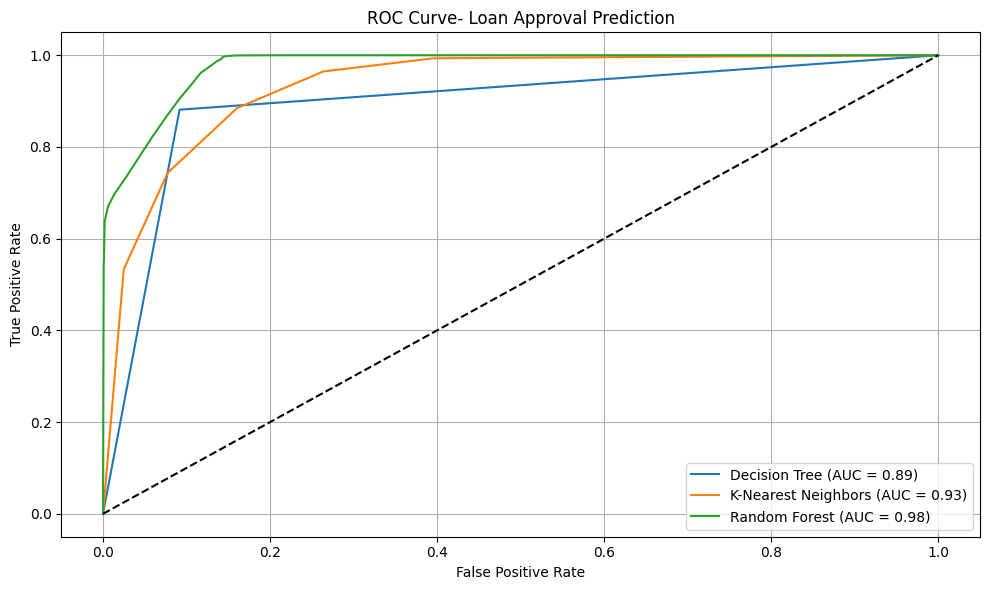

In [15]:
plt.figure(figsize=(10, 6))
for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC curve plotting for all 3 models
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Loan Approval Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/final(2).csv')
dataset

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [18]:
dataset.isnull().sum()

,0
Time,0
Protcol,0
Flag,0
Family,0
Clusters,0
SeddAddress,0
ExpAddress,0
BTC,0
USD,0
Netflow_Bytes,0


In [19]:
dataset.describe()

,Time,Clusters,BTC,USD,Netflow_Bytes,Port
count,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000
mean,21.466979,2.349295,30.554605,14863.441114,2021.278651,5063.949967
std,15.883598,2.828759,101.447102,26849.434659,2271.420987,2.696011
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


In [21]:
X = dataset.drop('Prediction', axis=1)
y = dataset['Prediction']

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
class_names

array(['A', 'S', 'SS'], dtype=object)

In [31]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab/final(2).csv')

# Select only numeric columns for scaling
X = df.select_dtypes(include=['number'])

# Apply StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(df['Prediction'])

# Step 2: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [33]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=31),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=4)
}


Decision Tree Metrics:

Accuracy: 0.9781609580999027
Precision: 0.9775111159550338
Recall: 0.9782658040069747
F1 Score: 0.9777953042025592

Confusion Matrix:
[[ 8080   219   104]
 [  130 13090   153]
 [   15    30  7988]]


K-Nearest Neighbors Metrics:

Accuracy: 0.964306082055755
Precision: 0.9624516730067244
Recall: 0.9635339849411318
F1 Score: 0.9629129001985622

Confusion Matrix:
[[ 7915   319   169]
 [  206 12963   204]
 [  130    36  7867]]


Random Forest Metrics:

Accuracy: 0.9780938642691804
Precision: 0.9774002523773931
Recall: 0.9781846401368295
F1 Score: 0.9776991458760073

Confusion Matrix:
[[ 8079   220   104]
 [  128 13090   155]
 [   19    27  7987]]



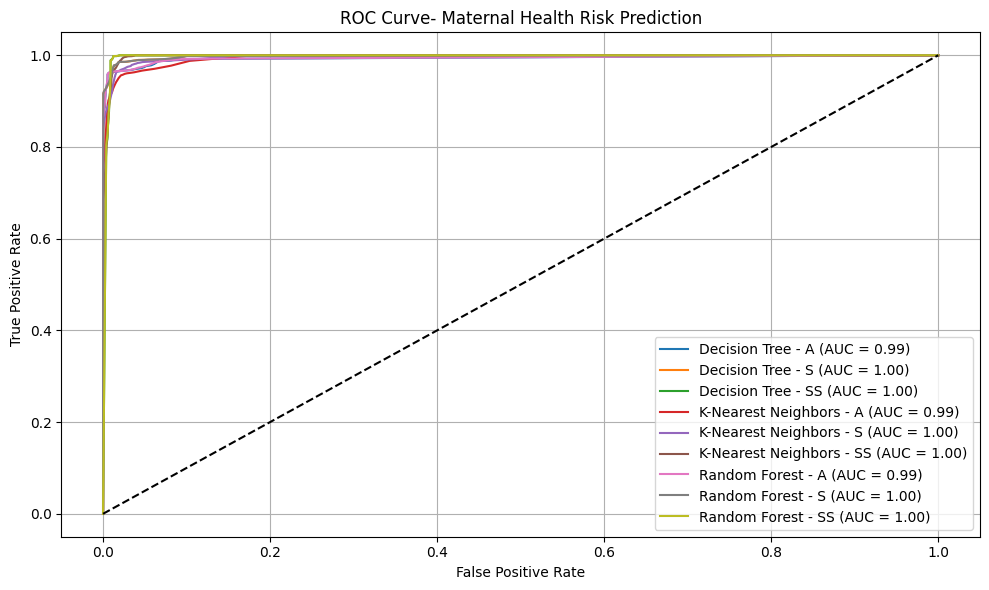

In [34]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) # for roc-auc value we need this probability

    print(f'\n{name} Metrics:\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))

    for i in range(len(class_names)):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Maternal Health Risk Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()